In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ratings_df=pd.read_excel("anime_kaggle/rating_complete.xlsx")

In [104]:
ratings_df.head(10)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
5,0,431,8
6,0,578,10
7,0,433,6
8,0,1571,10
9,0,121,9


In [105]:
ratings_df.shape

(1048575, 3)

In [106]:
ratings_df.describe()

,user_id,anime_id,rating
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.386592e+03,1.585070e+04,7.545780e+00
std,1.970657e+03,1.324630e+04,1.678920e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.612000e+03,3.167000e+03,7.000000e+00
50%,3.403000e+03,1.193300e+04,8.000000e+00
75%,5.163000e+03,2.899900e+04,9.000000e+00
max,6.745000e+03,4.845600e+04,1.000000e+01


In [107]:
ratings_df.isnull().sum() #no null values

user_id     0
anime_id    0
rating      0
dtype: int64

In [108]:
ratings_df.isna().sum() #no values na

user_id     0
anime_id    0
rating      0
dtype: int64

In [109]:
ratings_df['anime_id'].nunique()

12164

<AxesSubplot:xlabel='rating', ylabel='count'>

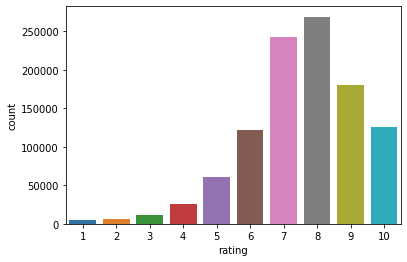

In [110]:
sns.countplot(x='rating',data=ratings_df)

In [111]:
#getting the anime id of top 10 most reviewed anime
top10=np.array(ratings_df['anime_id'].value_counts().sort_values(ascending=False).head(10).index)

In [112]:
top10

array([ 1535, 16498, 11757,  6547,  1575,  4224, 30276,  5114, 22319,
         199], dtype=int64)

In [113]:
filtered_rating=ratings_df[ratings_df['anime_id'].isin(top10)]

In [114]:
filtered_rating

,user_id,anime_id,rating
26,0,199,8
61,1,6547,6
70,1,1575,10
79,1,5114,10
83,1,1535,9
...,...,...,...
1048310,6743,22319,7
1048342,6743,1535,10
1048377,6744,1535,10
1048391,6744,1575,10


In [115]:
filtered_rating.shape

(27780, 3)

<AxesSubplot:xlabel='rating', ylabel='count'>

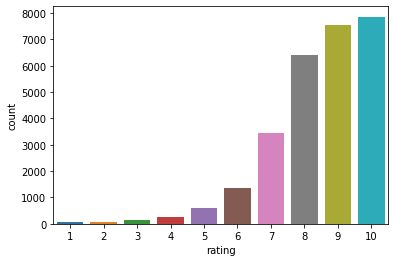

In [116]:
sns.countplot(x='rating',data=filtered_rating)

In [117]:
filtered_rating[filtered_rating['rating']>=9].count()#animes with rating above 9

user_id     15422
anime_id    15422
rating      15422
dtype: int64

In [118]:
anime_df=pd.read_excel('anime_kaggle/anime.xlsx')

In [119]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,ã‚«ã‚¦ãƒœãƒ¼ã‚¤ãƒ“ãƒãƒƒãƒ—,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,ã‚«ã‚¦ãƒœãƒ¼ã‚¤ãƒ“ãƒãƒƒãƒ— å¤©å›½ã®æ‰‰,Movie,1,"Sep 1, 2001",Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,ãƒˆãƒ©ã‚¤ã‚¬ãƒ³,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ã‚¦ã‚¤ãƒƒãƒãƒãƒ³ã‚¿ãƒ¼ãƒ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,å†’é™ºçŽ‹ãƒ“ã‚£ãƒˆ,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27


In [120]:
anime_names=anime_df[anime_df['MAL_ID'].isin(top10)]

In [121]:
anime_names.head(10)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
176,199,Sen to Chihiro no Kamikakushi,8.83,"Adventure, Supernatural, Drama",Spirited Away,åƒã¨åƒå°‹ã®ç¥žéš ã—,Movie,1,"Jul 20, 2001",Unknown,...,324768,254426,182709,76025,22207,7695,2393,856,489,1174
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,ãƒ‡ã‚¹ãƒŽãƒ¼ãƒˆ,TV,37,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,...,557406,535252,415890,201522,68577,28048,10462,3692,2256,3586
1431,1575,Code Geass: Hangyaku no Lelouch,8.72,"Action, Military, Sci-Fi, Super Power, Drama, ...",Code Geass:Lelouch of the Rebellion,ã‚³ãƒ¼ãƒ‰ã‚®ã‚¢ã‚¹ åé€†ã®ãƒ«ãƒ«ãƒ¼ã‚·ãƒ¥,TV,25,"Oct 6, 2006 to Jul 29, 2007",Fall 2006,...,326710,309688,213516,93305,31697,14686,7065,3100,1630,2621
3564,4224,Toradora!,8.24,"Slice of Life, Comedy, Romance, School",Toradora!,ã¨ã‚‰ãƒ‰ãƒ©ï¼,TV,25,"Oct 2, 2008 to Mar 26, 2009",Fall 2008,...,185286,255249,273494,160797,58749,25479,10810,4372,2456,2890
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,é‹¼ã®éŒ¬é‡‘è¡“å¸« FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,714811,401507,199160,70045,20210,9308,3222,1536,2162,16806
4636,6547,Angel Beats!,8.15,"Action, Comedy, Drama, School, Supernatural",Angel Beats!,Angel Beats!ï¼ˆã‚¨ãƒ³ã‚¸ã‚§ãƒ«ãƒ“ãƒ¼ãƒ„ï¼‰,TV,13,"Apr 3, 2010 to Jun 26, 2010",Spring 2010,...,200757,242398,264330,169476,68296,31152,14127,5810,2758,2569
6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ã‚½ãƒ¼ãƒ‰ã‚¢ãƒ¼ãƒˆãƒ»ã‚ªãƒ³ãƒ©ã‚¤ãƒ³,TV,25,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,...,241049,236672,305386,303813,188431,124819,81155,44204,25371,23472
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,é€²æ’ƒã®å·¨äºº,TV,25,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,470882,514879,459113,220228,70768,31141,11805,4637,2707,4939
8646,22319,Tokyo Ghoul,7.81,"Action, Mystery, Horror, Psychological, Supern...",Tokyo Ghoul,æ±äº¬å–°ç¨®-ãƒˆãƒ¼ã‚­ãƒ§ãƒ¼ã‚°ãƒ¼ãƒ«-,TV,12,"Jul 4, 2014 to Sep 19, 2014",Summer 2014,...,190342,250814,348603,261579,112177,51649,24805,10284,5144,4794
10451,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,ãƒ¯ãƒ³ãƒ‘ãƒ³ãƒžãƒ³,TV,12,"Oct 5, 2015 to Dec 21, 2015",Fall 2015,...,360187,465041,403832,172181,47365,17873,5706,2279,1448,2733


In [122]:
anime_dic=dict(zip(anime_names["MAL_ID"],anime_names["Name"]))

In [123]:
anime_dic

{199: 'Sen to Chihiro no Kamikakushi',
 1535: 'Death Note',
 1575: 'Code Geass: Hangyaku no Lelouch',
 4224: 'Toradora!',
 5114: 'Fullmetal Alchemist: Brotherhood',
 6547: 'Angel Beats!',
 11757: 'Sword Art Online',
 16498: 'Shingeki no Kyojin',
 22319: 'Tokyo Ghoul',
 30276: 'One Punch Man'}

In [124]:
filtered_rating['title']=filtered_rating['anime_id'].apply(lambda x: anime_dic[x])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
filtered_rating

,user_id,anime_id,rating,title
26,0,199,8,Sen to Chihiro no Kamikakushi
61,1,6547,6,Angel Beats!
70,1,1575,10,Code Geass: Hangyaku no Lelouch
79,1,5114,10,Fullmetal Alchemist: Brotherhood
83,1,1535,9,Death Note
...,...,...,...,...
1048310,6743,22319,7,Tokyo Ghoul
1048342,6743,1535,10,Death Note
1048377,6744,1535,10,Death Note
1048391,6744,1575,10,Code Geass: Hangyaku no Lelouch


In [126]:
filtered_rating['reward']=filtered_rating['rating'].apply(lambda x: 0 if x<10 else 1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
filtered_rating

,user_id,anime_id,rating,title,reward
26,0,199,8,Sen to Chihiro no Kamikakushi,0
61,1,6547,6,Angel Beats!,0
70,1,1575,10,Code Geass: Hangyaku no Lelouch,1
79,1,5114,10,Fullmetal Alchemist: Brotherhood,1
83,1,1535,9,Death Note,0
...,...,...,...,...,...
1048310,6743,22319,7,Tokyo Ghoul,0
1048342,6743,1535,10,Death Note,1
1048377,6744,1535,10,Death Note,1
1048391,6744,1575,10,Code Geass: Hangyaku no Lelouch,1


In [128]:
column_titles = ['user_id','anime_id','title','rating','reward']

filtered_rating.reindex(columns=column_titles)

,user_id,anime_id,title,rating,reward
26,0,199,Sen to Chihiro no Kamikakushi,8,0
61,1,6547,Angel Beats!,6,0
70,1,1575,Code Geass: Hangyaku no Lelouch,10,1
79,1,5114,Fullmetal Alchemist: Brotherhood,10,1
83,1,1535,Death Note,9,0
...,...,...,...,...,...
1048310,6743,22319,Tokyo Ghoul,7,0
1048342,6743,1535,Death Note,10,1
1048377,6744,1535,Death Note,10,1
1048391,6744,1575,Code Geass: Hangyaku no Lelouch,10,1


In [129]:
filtered_rating.head()

,user_id,anime_id,rating,title,reward
26,0,199,8,Sen to Chihiro no Kamikakushi,0
61,1,6547,6,Angel Beats!,0
70,1,1575,10,Code Geass: Hangyaku no Lelouch,1
79,1,5114,10,Fullmetal Alchemist: Brotherhood,1
83,1,1535,9,Death Note,0


In [130]:
#calculating the most liked anime out of the top 10 most reviewed movies

groups=filtered_rating.groupby("title")

In [131]:
anime_title=[]
anime_liked_percentage=[]
for title, title_df in groups:
    anime_title.append(title)
    anime_liked_percentage.append((np.sum(title_df["reward"])/len(title_df))*100)

In [132]:
liked_per_dic=dict(zip(anime_title,anime_liked_percentage))

In [133]:
liked_per_dic

{'Angel Beats!': 22.510181414291004,
 'Code Geass: Hangyaku no Lelouch': 33.803863298662705,
 'Death Note': 33.54430379746836,
 'Fullmetal Alchemist: Brotherhood': 52.423419930205505,
 'One Punch Man': 24.760076775431862,
 'Sen to Chihiro no Kamikakushi': 36.292642827784626,
 'Shingeki no Kyojin': 27.0846394984326,
 'Sword Art Online': 16.699539776462853,
 'Tokyo Ghoul': 12.684124386252046,
 'Toradora!': 23.52941176470588}

Text(0.5, 1.0, 'Liked Percentage of Top 10 Most Reviewd Anime')

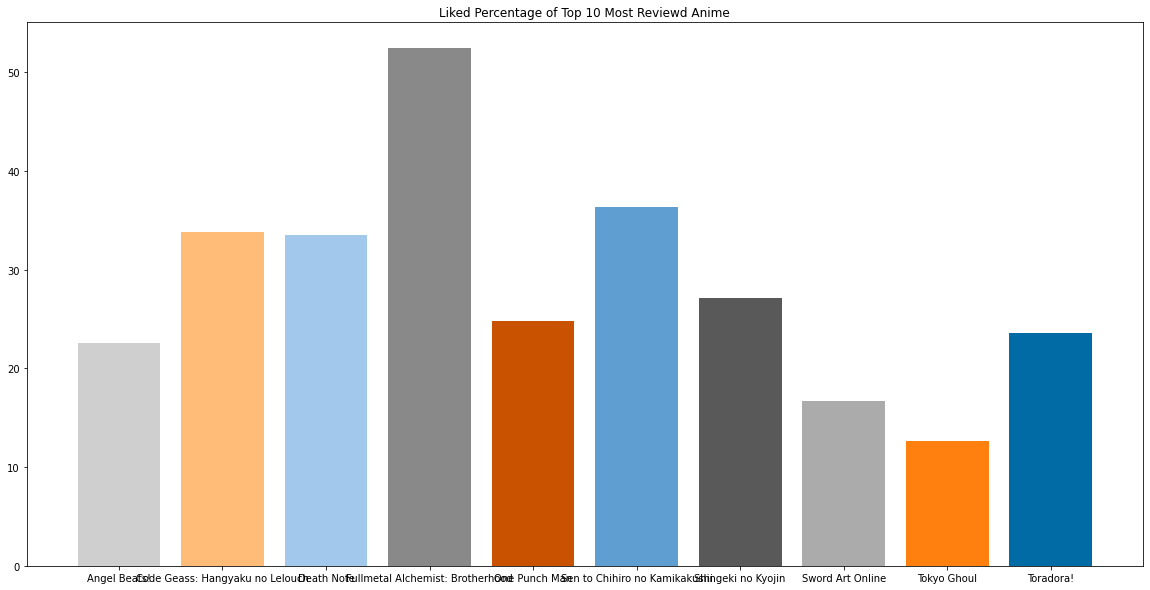

In [134]:
#color codes
c= ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(anime_title,height=anime_liked_percentage,color=c)
plt.title("Liked Percentage of Top 10 Most Reviewd Anime")


In [136]:
filtered_rating.to_excel('final_anime.xlsx')

In [144]:
liked_per=pd.DataFrame.from_dict(liked_per_dic,orient="index")
liked_per.to_csv("liked_per.csv")

In [145]:
anime_id_name=pd.DataFrame.from_dict(anime_dic,orient="index")
anime_id_name.to_csv("anime_id_name.csv")